In [67]:
##import fuctions from panda library
import pandas as pd

In [68]:
#Read the inputs and data collected - Data Collection
dataset=pd.read_csv("insurance_pre.csv")

In [69]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [70]:
#To find the which type of categorical data - find nominal data to Convert the numerical the inputs - Data Collection
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [71]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [72]:
# Arrange the dataset coloums
dataset = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'charges']]

In [73]:
dataset

,age,bmi,children,sex_male,smoker_yes,charges
0,19,27.900,0,0,1,16884.92400
1,18,33.770,1,1,0,1725.55230
2,28,33.000,3,1,0,4449.46200
3,33,22.705,0,1,0,21984.47061
4,32,28.880,0,1,0,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,0,1629.83350
1336,21,25.800,0,0,0,2007.94500


In [74]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [75]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [76]:
#Output Variable checking
dependent=dataset[["charges"]]

In [77]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [78]:
#Split the Train Data Inputs and outputs
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [79]:
#To select the model selection - Write Satndardisation Code Because R2 Value is low
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
X_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [211]:
#Create The Model 
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='best')
regressor=regressor.fit(X_train,y_train)

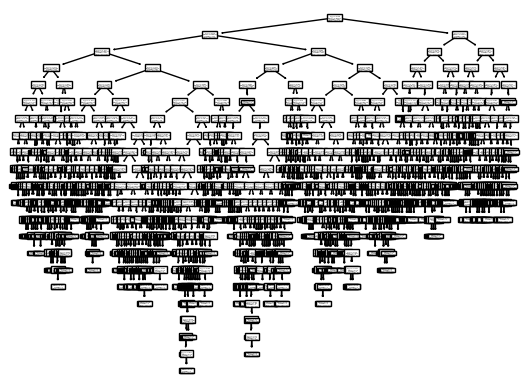

In [213]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [214]:
#To Calculate the evualation metrics
y_pred=regressor.predict(X_test)

In [215]:
##To Calculate and find -R_Score - evualation metrics for Actual Output Vs Predicted Output
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [216]:
r_score

0.7138009168142849

In [221]:
#To Save the File 
import pickle
filename='Insurance_Prediction__Decision_Tree_sav'

In [223]:
#To dump the final file and open
pickle.dump(regressor,open(filename,'wb'))

In [225]:
#To Load the final model and To find the result
loaded_model=pickle.load(open("Insurance_Prediction__Decision_Tree_sav",'rb'))
result=loaded_model.predict([[15,22,33,0,1]]) 

In [227]:
result

array([63770.42801])